In [1]:
import numpy as np
import matplotlib.pyplot as plt

from constants import MU, BETA4
from mottmassey import mm_potential
from scattering_length import fit_i4_a0, i4_tail, wave_function

plt.style.use('science')
ratio = 4/3
h = 3

In [2]:
GUESS = np.array([1.19175560e-01, 1.83340712e-03, -9.86485552e-01, -2.00617369e+01])

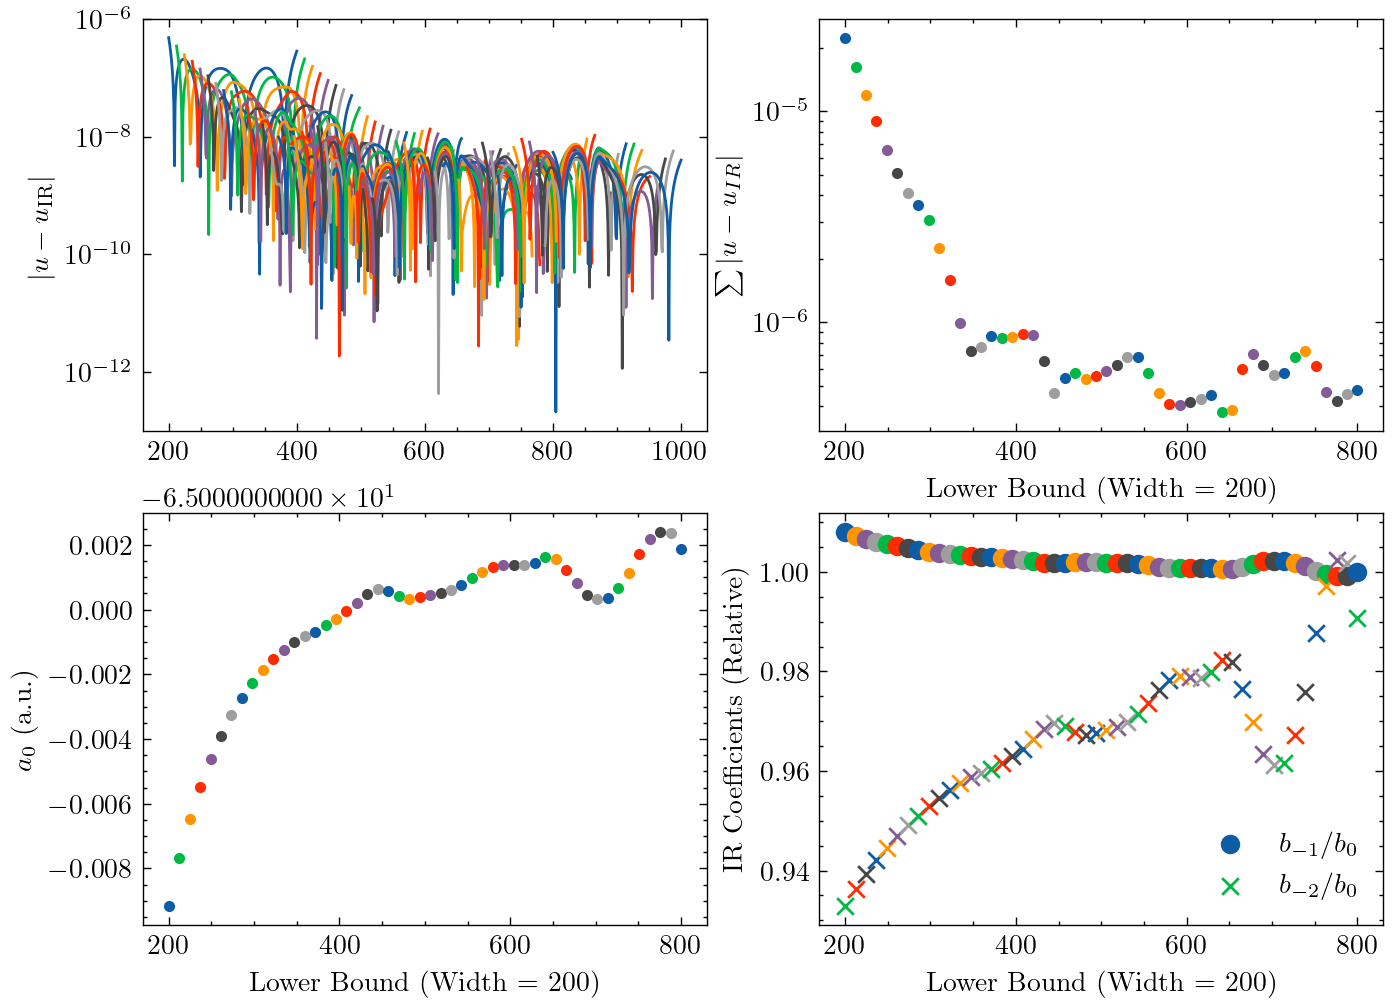

In [35]:
width = 200
lower_bounds = np.linspace(200, 800, 50)

ir1_label = r'$b_{-1}/b_0$'
ir2_label = r'$b_{-2}/b_0$'

fig, ax = plt.subplots(2, 2, figsize=(8, 6), dpi=200)
fig.patch.set_facecolor('white')

sol = wave_function(mm_potential, 0, r_endpts=[1e-3, 2000])
# guess = GUESS.copy()

for lb in lower_bounds:
    
    rs = np.linspace(lb, lb + width, 200)
    u = sol(rs)[0]

    a0, ir1_ratio, ir2_ratio, bs = fit_i4_a0(u, rs, guess=guess)
    guess = bs
    
    residuals = np.abs(u - i4_tail(rs, *bs))
    res_sum = np.sum(residuals)
    
    ax[0, 0].plot(rs, residuals)
#     ax[0, 0].set_xlabel(rf'$r$ (a.u.)')
    ax[0, 0].set_ylabel(r'$|u - u_{\rm IR}|$')
    ax[0, 0].set_yscale('log')
    
    ax[0, 1].scatter(lb, res_sum, marker='.')
    ax[0, 1].set_xlabel(rf'Lower Bound (Width = {width})')
    ax[0, 1].set_ylabel(r'$\sum|u - u_{IR}|$')
    ax[0, 1].set_yscale('log')
    
    ax[1, 0].scatter(lb, a0, marker='.')
    ax[1, 0].set_xlabel(rf'Lower Bound (Width = {width})')
    ax[1, 0].set_ylabel(r'$a_0$ (a.u.)')
    
    ax[1, 1].scatter(lb, ir1_ratio, marker='o', label=ir1_label)
    ax[1, 1].scatter(lb, ir2_ratio, marker='x', label=ir2_label)
    ax[1, 1].set_xlabel(rf'Lower Bound (Width = {width})')
    ax[1, 1].set_ylabel(r'IR Coefficients (Relative)')
    
    ir1_label = None
    ir2_label = None

ax[1, 1].legend();

In [36]:
a0

-64.9981306929964

In [37]:
A0_MM = -65